# Project Title: 

Implementation of Essential Data Structures and Algorithms in Python

# Project Overview: 

This project focuses on implementing fundamental data structures and algorithms, including trees (binary trees, binary search trees, and balanced trees) and hash tables, using Python programming language. In addition to the 

previously mentioned basic data structures (arrays, linked lists, stacks, and queues), the project will cover essential concepts in trees and hash tables, providing hands-on experience in designing, implementing, and analyzing their performance.
Project Objectives:

1.	Implement basic data structures including arrays, linked lists, stacks, and queues as well as trees (binary trees, binary search trees, and balanced trees) and hash tables in Python.
2.	Implement fundamental algorithms such as sorting algorithms (e.g., Bubble Sort, Insertion Sort, Merge Sort), searching algorithms (e.g., Linear Search, Binary Search), and tree traversal algorithms (e.g., in-order traversal, pre-order traversal, post-order traversal) in Python.
3.	Analyze the time complexity and space complexity of implemented algorithms, focusing on their efficiency and performance characteristics.
4.	Develop test cases to validate the correctness and effectiveness of implemented data structures and algorithms, covering various scenarios and edge cases.
5.	Compare the performance of different sorting algorithms and tree traversal algorithms in Python, evaluating their suitability for different input sizes and types.
6.	Explore and implement basic hash functions and collision resolution techniques in hash tables using Python.

Project Deliverables:

1.	Python code implementing basic data structures and algorithms including trees (binary trees, binary search trees, balanced trees) and hash tables.
2.	Documentation providing detailed explanations of the implemented data structures and algorithms, including design principles, functionalities, and usage examples, in Python.
3.	Test cases and validation reports demonstrating the correctness and effectiveness of implemented solutions, covering various scenarios and edge cases, in Python.
4.	Performance analysis report comparing the time complexity and space complexity of different algorithms in Python, evaluating their efficiency and performance characteristics.
5.	Presentation slides summarizing key findings, challenges faced, and lessons learned during the project, using Python.

## HashTables

In [9]:
#Creating hash table by copy-pasting last assignment

class HashTable:
    def __init__(self, name, size):
        self.name = name
        self.size = size
        self.table = [[] for _ in range(size)]

    def _hash_function(self, key):
        return key % self.size

    def add(self, key, value):
        index = self._hash_function(key)
        for pair in self.table[index]:
            if pair[0] == key:
                pair[1] = value
                return
        self.table[index].append([key, value])

    # Search function slightly changed so it harness the new functions to give cleaner output.
    def search(self, key):
        index = self._hash_function(key)
        for pair in self.table[index]:
            if pair[0] == key:
                # Check if the found item is a hash table or a product
                if isinstance(pair[1], HashTable):
                    # It's another hash table, so search in it
                    return pair[1].search(key)
                elif isinstance(pair[1], (Product, freshProduct)):
                    # It's a product, so return its name
                    return pair[1].name
        return None

    def remove(self, key):
        index = self._hash_function(key)
        for i, pair in enumerate(self.table[index]):
            if pair[0] == key:
                del self.table[index][i]
                return
            

    # Adding show function, that prints every element of the hash table.

    def show(self):
        print(f"This is the category {self.name}. It has a place for {self.size} items.")

        # Check if at least one variable has been printed
        product_found = False

        # For each item in the hash table
        for product in self.table:
            # Check if the bucket (product list) is not empty
            if product:
                for key, value in product:
                    # Depending on the type, either 'show' or 'info' is called
                    output = None
                    if hasattr(value, 'show'):
                        output = value.show()
                    elif hasattr(value, 'info'):
                        output = value.info()
                    # This is for checking if a product was found or not
                    if output is not None:
                        print(output)
                        product_found = True

        # After iterating through all buckets, check if at least one product was found
        if product_found:
            print(f"End of category {self.name}")
        else:
            pass


    # This just shows the name of the hashtables in the hashtables ##needs a fix to iterate inside every hashtable
    def simple_show(self):
        for product in self.table:
            for key, value in product:
                # Check if value is a hash table
                if hasattr(value, 'simple_show'):  
                    # Print the name of the hash table
                    print(value.name)  
                    # Recursively call simple_show on the nested hash table
                    value.simple_show()  


# Creating a new class for the products     
                
class Product:
    # Self is for the class, name has to be inputted by the user, in stock and value have
    #a preset value of 0, but can be specified by the user, kwargs is for adding more variable
    #from a dictionary
    def __init__(self, name, in_stock=0, value=0, **kwargs):
        for key, val in kwargs.items():
            setattr(self, key, val)
        self.in_stock = in_stock
        self.value = value
        self.name = name
    # Stock is for adding how many pieces of that product we have in the storage
    def stock(self, amount):
        self.in_stock += amount

    # Sell is for deleting that amount of pieces of that products from the storage
    def sell(self, amount):
        self.in_stock -= amount

    # Change value is for changing the price of the Product
    def change_value(self, value):
        self.value = value

    #Info is for having a pretty explanation of what the product is, how many we have in stock, and what's the unit value.
    def info(self):
        print(f"This product's name is {self.name}, there are {self.in_stock} in stock, with an individual value of {self.value}€.")
    

import heapq

class freshProduct(Product):
    def __init__(self, name, in_stock=0, value=0, **kwargs):
        super().__init__(name, in_stock, value, **kwargs)
        self.fresh = True
        self.expiry_dates = []  #Initializing the priority queue

    def stock(self, amount, expiry_date):
        self.in_stock += amount
        heapq.heappush(self.expiry_dates, (expiry_date, amount))  #Storing the expiry date and batch size

    def sell(self, amount):
        if self.in_stock < amount:
            print("Not enough stock")
        else:
            self.in_stock -= amount
            while amount > 0:
                expiry_date, batch_size = heapq.heappop(self.expiry_dates)  #Get the batch with the closest expiry date
                if batch_size <= amount:
                    amount -= batch_size
                else:
                    heapq.heappush(self.expiry_dates, (expiry_date, batch_size - amount))  #Put the remaining items back
                    amount = 0

    def check_closest_expiry(self):
        if self.expiry_dates:
            expiry_date, batch_size = self.expiry_dates[0]  #The smallest item is always at the front of the priority queue
            return expiry_date, batch_size
        else:
            return "No expiry dates available", 0

    def info(self):
        expiry_date, batch_size = self.check_closest_expiry()
        print(f"Product: {self.name} | In stock: {self.in_stock} | Value (€): {self.value}\nThe batch with the closest expiry date has {batch_size} items and expires on {expiry_date}.")
    

#### **Subcategories**

In [10]:
#Creating the subcategories
cleaning_products = HashTable("cleaning products", 10)
fruits = HashTable("fruits", 10)
berries = HashTable("berries", 10)
meats = HashTable("meats", 10)
dairy = HashTable("dairy", 10)
berries = HashTable("berries", 10)

#Adding the subcategories to the all products hash table
all_products = HashTable("all products", 10)
products = HashTable(0, 10)
all_products.add(0, products)
products.add(1, cleaning_products)
products.add(2, fruits)
products.add(3, meats)
products.add(4, dairy)

#Checking all the hashtables and what they contain.
print("All Products Categories:")
print(" ")
all_products.show()
print("\n")
print("Simple View of Categories:")
print(" ")
all_products.simple_show()

All Products Categories:
 
This is the category all products. It has a place for 10 items.
This is the category 0. It has a place for 10 items.
This is the category cleaning products. It has a place for 10 items.
This is the category fruits. It has a place for 10 items.
This is the category meats. It has a place for 10 items.
This is the category dairy. It has a place for 10 items.


Simple View of Categories:
 
0
cleaning products
fruits
meats
dairy


##### Cleaning Products

In [11]:
#Creating cleaning products

fairy = Product("Fairy", in_stock= 10, value= 3)
fairy.info()
fairy.stock(10)
fairy.change_value(1.5)
print("Value after change:")
fairy.info()
# __dict__ gives all the variables of the class as a dictionary.
print(fairy.__dict__)

omo = Product("Omo", in_stock = 50, value= 5)

# Adding the products to the hash table
cleaning_products.add(0, fairy)
cleaning_products.add(1, omo)

This product's name is Fairy, there are 10 in stock, with an individual value of 3€.
Value after change:
This product's name is Fairy, there are 20 in stock, with an individual value of 1.5€.
{'in_stock': 20, 'value': 1.5, 'name': 'Fairy'}


##### Fresh Products

In [12]:
#Adding products to the freshProduct class

from datetime import date

print("Product Information:\n")

#Dairy products
cheese = freshProduct("Cheese", in_stock=0, value=5)  #Initialize with no stock
cheese.stock(10, date(2025, 12, 31))  #Add 10 items with an expiry date of December 31, 2025
cheese.stock(5, date(2024, 10, 23))  #Add 5 more items with a different expiry date
cheese.info()  #Check the stock and the closest expiry date

milks = freshProduct("Milk", in_stock=0, value=1.5)
milks.stock(100, date(2024, 3, 29))
milks.stock(50, date(2024, 3, 30))
milks.info()

#Fruit products
apple = freshProduct("Apple", in_stock=0, value=0.5)
apple.stock(1000, date(2023, 12, 31))
apple.info()

bananas = freshProduct("Banana", in_stock=0, value=0.33)
bananas.stock(800, date(2024, 4, 22))
bananas.stock(200, date(2024, 5, 31))
bananas.info()

orange = freshProduct("Orange", in_stock=0, value=0.8)
orange.stock(500, date(2024, 5, 6))
orange.stock(150, date(2024, 5, 7))
orange.info()

#Berry products
lingonberry = freshProduct("Lingonberry (kg)", in_stock=0, value=15)
lingonberry.stock(1000, date(2024, 4, 15))
lingonberry.info()

blackberry = freshProduct("Blackberry (kg)", in_stock=0, value=5)
blackberry.stock(500, date(2024, 4, 17))
blackberry.info()

#Meat products
beef = freshProduct("Beef (kg)", in_stock=0, value=28)
beef.stock(300, date(2024, 4, 1))
beef.stock(200, date(2024, 4, 2))
beef.info()

chicken = freshProduct("Chicken (kg)", in_stock=0, value=9)
chicken.stock(250, date(2024, 3, 28))
chicken.info()

print("\n")

#Adding the fresh products to their corresponding hash tables
dairy.add(0, cheese)
dairy.add(1, milks)

fruits.add(0, apple)
fruits.add(1, bananas)
fruits.add(2, orange)
fruits.add(3, berries)


berries.add(0, lingonberry)
berries.add(1, blackberry)

meats.add(0, beef)
meats.add(1, chicken)

all_products.add(2, meats)

# Checking all the hashtables and what they contain.
all_products.show()
all_products.simple_show()




Product Information:

Product: Cheese | In stock: 15 | Value (€): 5
The batch with the closest expiry date has 5 items and expires on 2024-10-23.
Product: Milk | In stock: 150 | Value (€): 1.5
The batch with the closest expiry date has 100 items and expires on 2024-03-29.
Product: Apple | In stock: 1000 | Value (€): 0.5
The batch with the closest expiry date has 1000 items and expires on 2023-12-31.
Product: Banana | In stock: 1000 | Value (€): 0.33
The batch with the closest expiry date has 800 items and expires on 2024-04-22.
Product: Orange | In stock: 650 | Value (€): 0.8
The batch with the closest expiry date has 500 items and expires on 2024-05-06.
Product: Lingonberry (kg) | In stock: 1000 | Value (€): 15
The batch with the closest expiry date has 1000 items and expires on 2024-04-15.
Product: Blackberry (kg) | In stock: 500 | Value (€): 5
The batch with the closest expiry date has 500 items and expires on 2024-04-17.
Product: Beef (kg) | In stock: 500 | Value (€): 28
The batch 

In [13]:
# BST version
class TreeNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.left = None
        self.right = None

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def add(self, key, value):
        self.root = self._add_recursive(self.root, key, value)

    def _add_recursive(self, node, key, value):
        if node is None:
            return TreeNode(key, value)
        if key < node.key:
            node.left = self._add_recursive(node.left, key, value)
        elif key > node.key:
            node.right = self._add_recursive(node.right, key, value)
        else:  # Update value if key already exists
            node.value = value
        return node

    def search(self, key):
        return self._search_recursive(self.root, key)

    def _search_recursive(self, node, key):
        if node is None or node.key == key:
            return node.value if node else None
        if key < node.key:
            return self._search_recursive(node.left, key)
        return self._search_recursive(node.right, key)

    def remove(self, key):
        self.root = self._remove_recursive(self.root, key)

    def _remove_recursive(self, node, key):
        if node is None:
            return None
        if key < node.key:
            node.left = self._remove_recursive(node.left, key)
        elif key > node.key:
            node.right = self._remove_recursive(node.right, key)
        else:
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left
            min_node = self._find_min(node.right)
            node.key = min_node.key
            node.value = min_node.value
            node.right = self._remove_recursive(node.right, min_node.key)
        return node

    def _find_min(self, node):
        while node.left is not None:
            node = node.left
        return node

    def inorder_traversal(self):
        result = []
        self._inorder_traversal_recursive(self.root, result)
        return result

    def _inorder_traversal_recursive(self, node, result):
        if node:
            self._inorder_traversal_recursive(node.left, result)
            result.append((node.key, node.value))
            self._inorder_traversal_recursive(node.right, result)

# Usage example:
bst = BinarySearchTree()
bst.add(5, "Fairy")
bst.add(3, "Homo")
bst.add(7, "Apple")
bst.add(2, "Banana")
bst.add(4, "Lingonberry")
print("Inorder traversal:", bst.inorder_traversal())
print("Search 4:", bst.search(4))
bst.remove(3)
print("Inorder traversal after removing 3:", bst.inorder_traversal())


Inorder traversal: [(2, 'Banana'), (3, 'Homo'), (4, 'Lingonberry'), (5, 'Fairy'), (7, 'Apple')]
Search 4: Lingonberry
Inorder traversal after removing 3: [(2, 'Banana'), (4, 'Lingonberry'), (5, 'Fairy'), (7, 'Apple')]


## Tree

In [14]:
from graphviz import Digraph
from IPython.display import SVG
from collections import deque

# BST version
class TreeNode:
    def __init__(self, key, value, in_stock, price):
        self.key = key
        self.value = value
        self.in_stock = in_stock
        self.price = price
        self.left = None
        self.right = None

class BinarySearchTree:
    def __init__(self):
        self.root = None

# Function for adding a new key-value (the id and product) with the amount of stock and price
    def add(self, key, value, in_stock = 0 , price = 0):
        self.root = self._add_recursive(self.root, key, value, in_stock, price)

# This function adds a new node to the tree
    def _add_recursive(self, node, key, value, in_stock, price):
        if node is None:
            return TreeNode(key, value, in_stock, price)
        if key < node.key:
            node.left = self._add_recursive(node.left, key, value, in_stock, price)
        elif key > node.key:
            node.right = self._add_recursive(node.right, key, value, in_stock, price)
        else:  # Here it updates the value if the key already exists
            node.value = value
            node.in_stock += in_stock
        return node

# Function to search for a key 
    def search(self, key):
        return self._search_recursive(self.root, key)

# Function to search for a key recursively
    def _search_recursive(self, node, key):
        if node is None or node.key == key:
            return node if node else None
        if key < node.key:
            return self._search_recursive(node.left, key)
        return self._search_recursive(node.right, key)

# Function to remove a node with a given key
    def remove(self, key):
        self.root = self._remove_recursive(self.root, key)

# Removes a node recursively with a given key
    def _remove_recursive(self, node, key):
        if node is None:
            return None
        if key < node.key:
            node.left = self._remove_recursive(node.left, key)
        elif key > node.key:
            node.right = self._remove_recursive(node.right, key)
        else:
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left
            min_node = self._find_min(node.right)
            node.key = min_node.key
            node.value = min_node.value
            node.stock = min_node.stock
            node.price = min_node.price
            node.right = self._remove_recursive(node.right, min_node.key)
        return node

# Finds the minimum (left-most node in the tree)
    def find_min(self, node):
        while node.left is not None:
            node = node.left
        return node
    
    def find_max(self, node):
        while node.right is not None:
            node = node.right
        return node
    
# Inorder traversal of the binary tree and returns the result
    def inorder_traversal(self):
        result = []
        self._inorder_traversal_recursive(self.root, result)
        return result

# Inorder traversal of the binary tree recursively
    def _inorder_traversal_recursive(self, node, result):
        if node:
            self._inorder_traversal_recursive(node.left, result)
            result.append((node.key, node.value, node.in_stock, node.price))
            self._inorder_traversal_recursive(node.right, result)

    def visualize(self):
        dot = Digraph(comment='Binary Tree')
        
        def add_nodes_edges(node):
            if node is None:
                return
            dot.node(str(node.value), str(node.value))
            if node.left is not None:
                dot.edge(str(node.value), str(node.left.value))
                add_nodes_edges(node.left)
            if node.right is not None:
                dot.edge(str(node.value), str(node.right.value))
                add_nodes_edges(node.right)
        
        add_nodes_edges(self.root)
        return SVG(dot.pipe(format='svg'))
    
    def visualize_imported(self):
        dot = Digraph(comment='Binary Tree')
        
        def add_nodes_edges(node):
            if node is None:
                return
            dot.node(str(node.value.name), str(node.value.name))
            if node.left is not None:
                dot.edge(str(node.value.name), str(node.left.value.name))
                add_nodes_edges(node.left)
            if node.right is not None:
                dot.edge(str(node.value.name), str(node.right.value.name))
                add_nodes_edges(node.right)
        
        add_nodes_edges(self.root)
        return SVG(dot.pipe(format='svg'))
    
    def find_predecessor(self, key):
        node = self.search(key)
        if node is None:
            return None
        if node.left is not None:
            return self._find_max(node.left)
        ancestor = None
        current = self.root
        while current.key != key:
            if key > current.key:
                ancestor = current
                current = current.right
            else:
                current = current.left
        return ancestor
    
    def find_successor(self, key):
        node = self.search(key)
        if node is None:
            return None
        if node.right is not None:
            return self._find_min(node.right)
        ancestor = None
        current = self.root
        while current.key != key:
            if key < current.key:
                ancestor = current
                current = current.left
            else:
                current = current.right
        return ancestor

## Testing

In [15]:
# A placeholder for the list of keys generated by the populate_bst_with_products function
keys = []

# Function to populate the BST with products from the hash table
def populate_bst_with_products(bst, hash_table, prefix=''):
    # For each bucket in the hash table
    for index, bucket in enumerate(hash_table.table):
        # For each key-value pair in the bucket
        for key, value in bucket:

            # Create a unique name for the product
            name = getattr(value, 'name', str(key)) 
            # If the product has a name attribute, use it; otherwise, use the key 
            unique_name = f"{prefix}{name}"
            # Add the unique name to the list of keys
            keys.append(unique_name)

            # Add the product to the BST
            try:
                bst.add(unique_name, value.name, value.in_stock, value.price)
            except:
                bst.add(unique_name, value, 0, 0)

            # If the value is a hash table, recursively populate the BST with its products
            if hasattr(value, 'table'):  
                # Recursively call the function with the nested hash table
                populate_bst_with_products(bst, value, prefix=unique_name + '-')


# Create a new BST
all_products_tree = BinarySearchTree()

# Populate the BST with products from the hash table
populate_bst_with_products(all_products_tree, all_products)

# Print the keys generated by the populate_bst_with_products function
print(keys)

# Search for a product in the BST
key_to_search = '0-cleaning products-Omo'

# Search for the product
print((all_products_tree.search(key_to_search)).value.name)



['0', '0-cleaning products', '0-cleaning products-Fairy', '0-cleaning products-Omo', '0-fruits', '0-fruits-Apple', '0-fruits-Banana', '0-fruits-Orange', '0-fruits-berries', '0-fruits-berries-Lingonberry (kg)', '0-fruits-berries-Blackberry (kg)', '0-meats', '0-meats-Beef (kg)', '0-meats-Chicken (kg)', '0-dairy', '0-dairy-Cheese', '0-dairy-Milk', 'meats', 'meats-Beef (kg)', 'meats-Chicken (kg)']
Omo


search took 0.0 seconds to run.


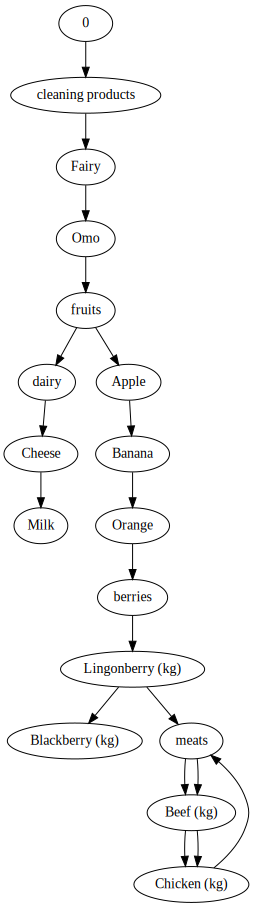

In [16]:
#Timing this:
import time 

def time_function(func, *args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    print(f"{func.__name__} took {end_time - start_time} seconds to run.")
    return result

time_function(all_products_tree.search, '0-cleaning products-Omo')

all_products_tree.visualize_imported()


**Timing all the functions**

In [17]:
import time

# Create an instance of the BST
bst = all_products_tree

# Time the add function
start_time = time.time()
bst.add("1", "Apple", 50, 0.5)
end_time = time.time()
print(f"Time taken for add function: {end_time - start_time} seconds")

# Time the search function
start_time = time.time()
bst.search("1")
end_time = time.time()
print(f"Time taken for search function: {end_time - start_time} seconds")

# Time the remove function
start_time = time.time()
bst.remove("1")
end_time = time.time()
print(f"Time taken for remove function: {end_time - start_time} seconds")

# Time the find_min function
start_time = time.time()
bst.find_min(bst.root)
end_time = time.time()
print(f"Time taken for find_min function: {end_time - start_time} seconds")

# Time the find_max function
start_time = time.time()
bst.find_max(bst.root)
end_time = time.time()
print(f"Time taken for find_max function: {end_time - start_time} seconds")

# Time the inorder_traversal function
start_time = time.time()
bst.inorder_traversal()
end_time = time.time()
print(f"Time taken for inorder_traversal function: {end_time - start_time} seconds")

# Time the find_predecessor function
start_time = time.time()
bst.find_predecessor("1")
end_time = time.time()
print(f"Time taken for find_predecessor function: {end_time - start_time} seconds")

# Time the find_successor function
start_time = time.time()
bst.find_successor("1")
end_time = time.time()
print(f"Time taken for find_successor function: {end_time - start_time} seconds")



Time taken for add function: 0.0 seconds
Time taken for search function: 0.0 seconds
Time taken for remove function: 0.0 seconds
Time taken for find_min function: 0.0 seconds
Time taken for find_max function: 0.0 seconds
Time taken for inorder_traversal function: 0.0 seconds
Time taken for find_predecessor function: 0.0 seconds
Time taken for find_successor function: 0.008001089096069336 seconds


## Randomizing and iterating the timing

In [18]:
import time
import random
import string

# Create an instance of the BST
bst = all_products_tree

# Time the add function
start_time = time.time()
for _ in range(10):
    for _ in range(100):
        random_key = ''.join(random.choices(string.ascii_uppercase + string.digits, k=5))
        random_value = ''.join(random.choices(string.ascii_uppercase + string.digits, k=5))
        random_in_stock = random.randint(0, 100)
        random_price = random.uniform(0.5, 99.5)
        bst.add(random_key, random_value, random_in_stock, random_price)
end_time = time.time()
print(f"Time taken for add function: {end_time - start_time} seconds")

# Time the search, remove, find_predecessor, and find_successor functions
for operation in [bst.search, bst.remove, bst.find_predecessor, bst.find_successor]:
    start_time = time.time()
    for _ in range(10):
        for _ in range(100):
            random_key = ''.join(random.choices(string.ascii_uppercase + string.digits, k=5))
            operation(random_key)
    end_time = time.time()
    print(f"Time taken for {operation.__name__} function: {end_time - start_time} seconds")

# Time the find_min, find_max, and inorder_traversal functions
for operation in [bst.find_min, bst.find_max, bst.inorder_traversal]:
    start_time = time.time()
    for _ in range(10):
        if operation == bst.inorder_traversal:
            operation()
        else:
            operation(bst.root)
    end_time = time.time()
    print(f"Time taken for {operation.__name__} function: {end_time - start_time} seconds")

Time taken for add function: 0.06401395797729492 seconds
Time taken for search function: 0.015988588333129883 seconds
Time taken for remove function: 0.016003131866455078 seconds
Time taken for find_predecessor function: 0.008016586303710938 seconds
Time taken for find_successor function: 0.015983104705810547 seconds
Time taken for find_min function: 0.0 seconds
Time taken for find_max function: 0.0 seconds
Time taken for inorder_traversal function: 0.01600337028503418 seconds


## Comparing search functions of hash table and binary search tree.

In [19]:
from random import randint

def compare_search_speeds(hash_table, binary_search_tree, key):
    # Time the search function for the hash table
    start_time = time.time()
    print(hash_table.search(key))
    end_time = time.time()
    hash_table_time = end_time - start_time

    # Time the search function for the binary search tree
    start_time = time.time()
    binary_search_tree.search(key)
    end_time = time.time()
    binary_search_tree_time = end_time - start_time

    print(f"Time taken for search function in HashTable: {hash_table_time:.20f} seconds")
    print(f"Time taken for search function in BinarySearchTree: {binary_search_tree_time:.20f} seconds")

# Create instances of HashTable and BinarySearchTree
ht = HashTable("testing table", 100)
bst = BinarySearchTree()



# Start the timer
start_time_BST = time.time()

# Add entries to the hash table and binary search tree
for i in range(1000000):
    bst.add(randint(1,10000), "value")

# Stop the timer
end_time_BST = time.time()

# Calculate and print the elapsed time
elapsed_time_BST = end_time_BST - start_time_BST
print(f"Adding 1 000 000 entries BST took {elapsed_time_BST} seconds")



# Start the timer
start_time_HT = time.time()

# Add entries to the hash table and binary search tree
for i in range(1000000):
    ht.add(randint(1,10000), "value")

# Stop the timer
end_time_HT = time.time()

# Calculate and print the elapsed time
elapsed_time_HT = end_time_HT - start_time_HT
print(f"Adding 1 000 000 entries to HT took {elapsed_time_HT} seconds")

# Compare the search speeds
compare_search_speeds(ht, bst, randint(1,10000))

Adding 1 000 000 entries BST took 12.132734298706055 seconds
Adding 1 000 000 entries to HT took 18.259533643722534 seconds
None
Time taken for search function in HashTable: 0.00000000000000000000 seconds
Time taken for search function in BinarySearchTree: 0.00000000000000000000 seconds
